# Capstone Project - Seattle car accident data gathering and predictive model for Insurance Company

## Applied Data Science Capstone by IBM/Coursera 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="## Introduction / Business Problem">Introduction</a></li>
        <li><a href="## Data">Data</a></li>
        <li><a href="## Exploratory Data Analysis (EDA)">Exploratory Data Analysis</a></li>
        <li><a href="## Model Construction">Model construction</a></li>
        <li><a href="## Conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

## Introduction / Business Problem

A growing **Health Insurance business** settled down in Seattle is **concerned about the price and conditions of insurance policies related to car accidents.** Stakeholders are having a hard time defining new policies and conditions related to coverage and *cost of insurances related to car accidents.* As no clear overview can be defined, it is clear that more information is needed to make a decision. **Increasing the cost** of the insurance would highly impact the desire of customers to acquire the service, so stakeholders want to determine what changes can be made to the coverage of the health policy related to car accidents.

**As such, stakeholders have decided that:**

1. They need to know the estimation of the number of accidents in the previous years.
2. From those accidents, how many accidents involve injuries for hospitalization. Fatalities are discarded as they're not covered inside the insurance.
3. Determine a way to predict if a car accident involves the hospitalization of the drivers affected.


With this information, stakeholders can clearly make decisions on how they should update their policies involving coverage in hospitalization costs related to car accidents. As such, a team of Data analysts was hired to find the necessary information and build a model that can predict the severity of a collision based on the car accident data of the previous years in Seattle.


**Our target audience will be the insurance company, and the customers that acquire the service.** The company will highly benefit from the information as if they know and segment their policies depending on the classification of the car accident, they could deduce clauses that would help them reduce costs due to affected customers. Also the customers acquiring the company service can be benefited as they'll be more aware of the type of accidents where they'll get coverage on, and how they could use the insurance service more effectively.

## Data

Based in the Business Problem presented above, we'll gather data focusing on:

- Parameters that influence the most accidents
- Type of collisions that were mostly registered
- Frequency of severity index associated to car accidents

As such, we will use an the car accident data set from previous years to determine which parameters or which type of collision can be associated to a higher severity index. 

### Parameter analysis

Before discussing the data, we're going to upload it to the current notebook in order to understand what kind of information we have in hand. 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

Let's load the information

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_09888307c6ef4063a9a107b821c8a1e0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DjvahiosCXiWAwfeXDDTesitIRBMGuKFUd673tBzV5c7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_09888307c6ef4063a9a107b821c8a1e0.get_object(Bucket='courseracapstoneproject-donotdelete-pr-otygyojtpjucg5',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Car accidents have many factors that produce them. In the case of Seattle, it would be good to determine which factor is the one that causes the more incidents. Is it the weather? Is the driver under the effects of alcohol or drugs? Was the driver distracted while driving? In this case, we we'll segment our dataframe to determine which conditions are the ones that cause the most accidents.

## Exploratory Data Analysis (EDA)

### Determining the number of accidents caused by bad weather

In [3]:
df_data_1['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

As we can observe, most of the accidents were produced when there was clear weather, so we can discard weather as a big factor in car incidents. 

### Determining the number of accidents caused by distracted persons

In [4]:
df_data_1['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

We have even less incidents caused by distracted persons. We can deduce that the use of cellphone was not a big factor that caused the incidents.

### Determining the number of accidents caused by influence of alcohol or drugs

In [5]:
df_data_1['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

Again yet, there are not many cases pertaining people under influence to be considered a factor that causes accidents.

### Determining the number of accidents caused by road condition or lighting

In [6]:
df_data_1['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [7]:
df_data_1['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

Most of the accidents were caused in daylight, and under normal dry conditions of the road. I'm starting to think that most of the accidents may have been caused due to the avenues or streets disposition. Let's determine if the accidents occurred at intersection, highways or avenues. After determining the biggest factor, we can star working with the severity of each incident. 

### Places where incidents occurred

In [8]:
df_data_1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

Ok, now we know that most of the incidents are not necessarily at junctions, they were produced Mid-Block. Now I question. Where the drivers speeding up?

In [9]:
df_data_1['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

Most of the drivers were not speeding, as the total number of incidents is higher in comparison. As we can see, we have determined that the normal studied factors that cause accidents cannot be used to determine incidence as most incidents have been casual incidents under normal weather, dry conditions, by persons that were concentrated driving. So moving on, it would be good to determine the type of collision and how severe the collisions were. 

### Type of incident

In [10]:
df_type=df_data_1['ST_COLDESC'].value_counts() 
df_type.head(6)

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
From opposite direction - one left turn - one straight                 10324
Name: ST_COLDESC, dtype: int64

In [11]:
df_counts1=df_data_1['COLLISIONTYPE'].value_counts().reset_index(name='frequency')
df_counts1

,index,frequency
0,Parked Car,47987
1,Angles,34674
2,Rear Ended,34090
3,Other,23703
4,Sideswipe,18609
5,Left Turn,13703
6,Pedestrian,6608
7,Cycles,5415
8,Right Turn,2956
9,Head On,2024


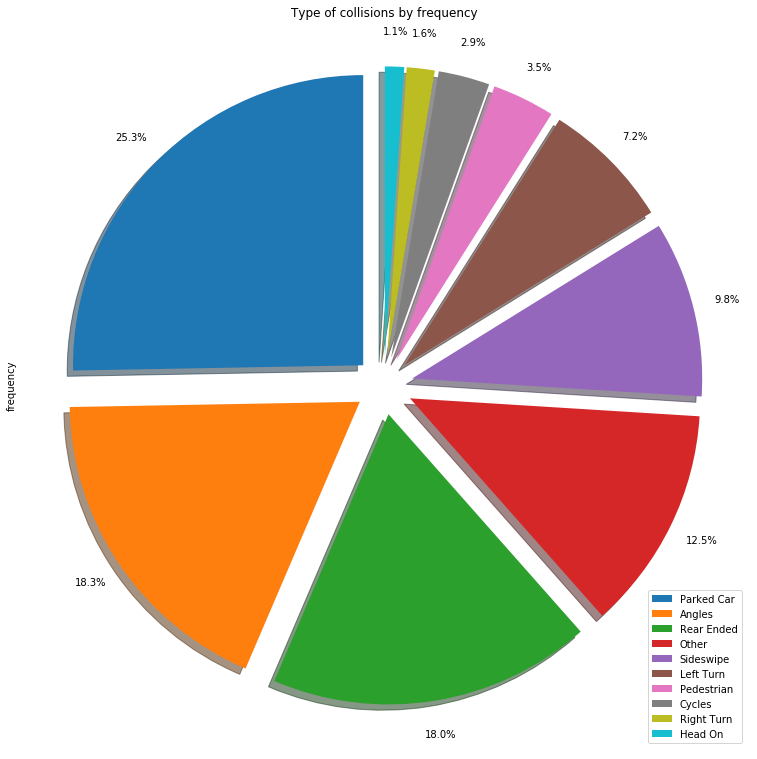

In [12]:
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
df_counts1['frequency'].plot(kind='pie',
                            figsize=(13, 18),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,
                            explode = explode_list)

plt.title('Type of collisions by frequency')
plt.legend(labels=df_counts1['index'], loc='lower right') 
plt.show()

As stated, most of the accidents have been casual incidents. Taking the 6 types that have more influence over the dataframe, it would be good to determine if they have a relationship with the severity index. Afterwards, we can use the rest of the dataframe to determine if the other types of incidents have a high severity index. We start by determining the counts in the severity index.

In [13]:
df_counts=df_data_1['SEVERITYCODE'].value_counts().reset_index(name='frequency')
df_counts

,index,frequency
0,1,136485
1,2,58188


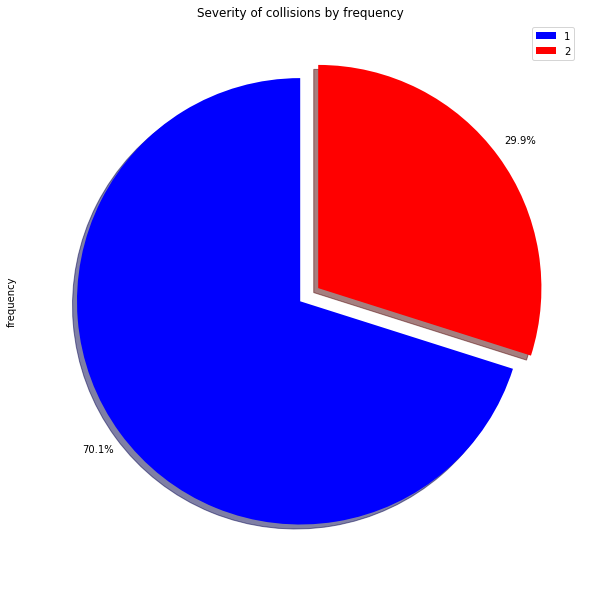

In [14]:
explode_list = [0, 0.1]
df_counts['frequency'].plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=['blue','red'],
                            pctdistance=1.12,
                            explode = explode_list)

plt.title('Severity of collisions by frequency')
plt.legend(labels=df_counts['index'], loc='upper right') 
plt.show()

Is good to see that from all the information gathered, the incidents don't involve serious injuries or fatalities. Most of the incidents are related to property damage. So, let's analyze if there's a relationship between the type of collision and the severity of the incident. 

In [15]:
df_st=df_data_1.groupby('ST_COLDESC')['SEVERITYCODE'].value_counts().reset_index(name="frequency")
df_st.set_index(['ST_COLDESC'], inplace=True)
df_st.set_index(['SEVERITYCODE'], append=True, inplace=True)
df_st=df_st.sort_values(['frequency'], ascending=False)
df_st.head(20)

frequency
ST_COLDESC                                         SEVERITYCODE           
One parked--one moving                             1                 42276
Entering at angle                                  1                 21050
From same direction - both going straight - one... 1                 14403
Entering at angle                                  2                 13624
From same direction - both going straight - one... 2                 11368
From same direction - both going straight - bot... 1                 11016
Fixed object                                       1                 10263
From opposite direction - one left turn - one s... 1                  5693
                                                   2                  4631
From same direction - both going straight - bot... 1                  4575
Vehicle - Pedalcyclist                             2                  4122
From same direction - all others                   1                  3697
Fixed object                                       2                  3291
From same direction - both going straight - bot... 2                  3054
Vehicle going straight hits pedestrian             2                  2567
One car leaving parked position                    1                  2404
From same direction - one left turn - one straight 1                  2362
From same direction - one right turn - one stra... 1                  2347
From same direction - both going straight - one... 1                  2188
One parked--one moving                             2                  2145

In [16]:
df_st=df_st.unstack(level=[1])

Text(0, 0.5, 'Frequency')

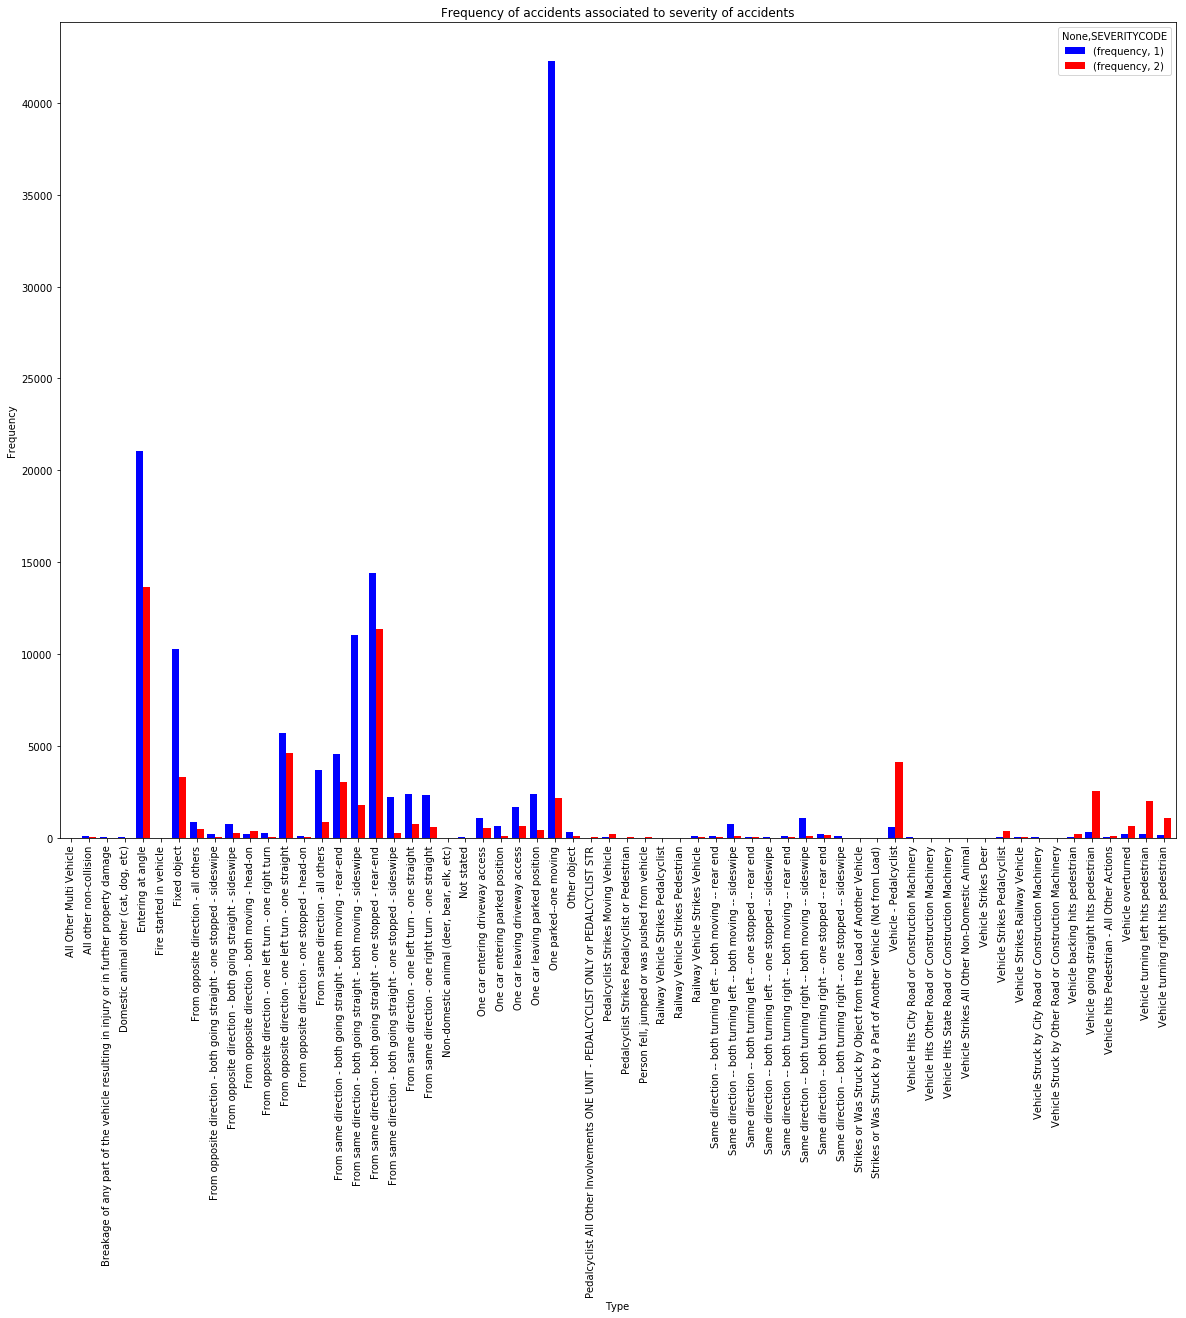

In [17]:
df_st.plot(kind='bar', figsize=(20,15), color=['blue','red'], width=0.8)

plt.title('Frequency of accidents associated to severity of accidents')
plt.xlabel('Type')
plt.ylabel('Frequency')

Now we have the most common type of collisions and the severity associated to those collisions. As we can see, the top type of collision is one parked and one moving. The severity associated to this type of collision relates to propietary damage. On the other hand, we see that incidents produced at angles have the most cases related to injuries in term of severity, but we also see from the graph above that accidents involving pedestrians and cyclists will most probably end in injury. As such, we could use the type of collision in order to predict whether an incident is of class "1" or class "2". This will be our key independent variable. As such, we will add other factors to our clean data frame that will increase the accuracy of our prediction in terms of predicting the severity of the collision.

### Dataframe cleaning process

We start by cleaning up our original dataframe, we start by determining the type of each column

In [18]:
df_data_1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [19]:
df_data_1.shape

(194673, 38)

We have 38 different type of variables, so we can start by dropping columns we consider irrelevant to our current purpose like ID, location, number of injuries, and fatalities, as we already determined that the current dataset has no fatalities in the data. 

In [20]:
df = df_data_1.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY'], axis=1)
df.head(5)

,SEVERITYCODE,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [21]:
df = df.drop(['LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM'], axis=1)
df.head(5)

,SEVERITYCODE,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N
1,1,Block,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,Block,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,...,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N
3,1,Block,1,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,N
4,2,Intersection,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,...,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N


In [22]:
df = df.drop(['SEGLANEKEY','CROSSWALKKEY','WEATHER','LIGHTCOND','ROADCOND','ADDRTYPE','PERSONCOUNT','PEDCOUNT'], axis=1)
df.head()

,SEVERITYCODE,SEVERITYCODE.1,COLLISIONTYPE,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,2,Angles,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,NaN,NaN,10,Entering at angle,N
1,1,1,Sideswipe,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,11,From same direction - both going straight - bo...,N
2,1,1,Parked Car,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,32,One parked--one moving,N
3,1,1,Other,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,NaN,NaN,23,From same direction - all others,N
4,2,2,Angles,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,NaN,NaN,10,Entering at angle,N


In [23]:
df = df.drop(['VEHCOUNT','INCDATE','SEVERITYCODE.1'], axis=1)
df.head()

,SEVERITYCODE,COLLISIONTYPE,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Angles,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,NaN,NaN,10,Entering at angle,N
1,1,Sideswipe,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,11,From same direction - both going straight - bo...,N
2,1,Parked Car,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,32,One parked--one moving,N
3,1,Other,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,NaN,NaN,23,From same direction - all others,N
4,2,Angles,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,NaN,NaN,10,Entering at angle,N


Now we have a less robust dataframe to analyze with some nice factors that could help us predict the severity of the incidents, but we still need to clean the dataframe a bit more. We proceed to clean up the dataframe determining if there are null rows or copied rows.

### Further cleaning the data set

We start by determining if there are duplicate rows in our dataset as that would affect the accuracy of our model. 

In [24]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (9687, 12)


In [25]:
df.count()

SEVERITYCODE      194673
COLLISIONTYPE     189769
PEDCYLCOUNT       194673
INCDTTM           194673
JUNCTIONTYPE      188344
INATTENTIONIND     29805
UNDERINFL         189789
PEDROWNOTGRNT       4667
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
HITPARKEDCAR      194673
dtype: int64

In [26]:
df = df.drop_duplicates()
df.head(5)

,SEVERITYCODE,COLLISIONTYPE,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Angles,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,NaN,NaN,10,Entering at angle,N
1,1,Sideswipe,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,11,From same direction - both going straight - bo...,N
2,1,Parked Car,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,32,One parked--one moving,N
3,1,Other,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,NaN,NaN,23,From same direction - all others,N
4,2,Angles,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,NaN,NaN,10,Entering at angle,N


In [27]:
df.count()

SEVERITYCODE      184986
COLLISIONTYPE     181557
PEDCYLCOUNT       184986
INCDTTM           184986
JUNCTIONTYPE      178821
INATTENTIONIND     29542
UNDERINFL         181577
PEDROWNOTGRNT       4628
SPEEDING            9245
ST_COLCODE        184968
ST_COLDESC        181557
HITPARKEDCAR      184986
dtype: int64

As we have seen in the counts, we have almost eliminated 10000 duplicate rows. We proceed in determining if there are null values in our dataframe. 

In [28]:
print(df.isnull().sum())

SEVERITYCODE           0
COLLISIONTYPE       3429
PEDCYLCOUNT            0
INCDTTM                0
JUNCTIONTYPE        6165
INATTENTIONIND    155444
UNDERINFL           3409
PEDROWNOTGRNT     180358
SPEEDING          175741
ST_COLCODE            18
ST_COLDESC          3429
HITPARKEDCAR           0
dtype: int64


If we drop null values in this dataframe, we would be eliminating a lot of rows, so we just proceed with our current data frame.

### Final Working Data Set

Now we have a clean data set to work with. 

In [29]:
df

,SEVERITYCODE,COLLISIONTYPE,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Angles,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,NaN,NaN,10,Entering at angle,N
1,1,Sideswipe,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,11,From same direction - both going straight - bo...,N
2,1,Parked Car,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,32,One parked--one moving,N
3,1,Other,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,NaN,NaN,23,From same direction - all others,N
4,2,Angles,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,NaN,NaN,10,Entering at angle,N
5,1,Angles,0,4/20/2019 5:42:00 PM,At Intersection (intersection related),NaN,N,NaN,NaN,10,Entering at angle,N
6,1,Angles,0,12/9/2008,At Intersection (intersection related),NaN,0,NaN,NaN,10,Entering at angle,N
7,2,Cycles,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),NaN,N,NaN,NaN,5,Vehicle Strikes Pedalcyclist,N
8,1,Parked Car,0,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),NaN,0,NaN,NaN,32,One parked--one moving,N
9,2,Angles,0,3/20/2006 3:49:00 PM,At Intersection (intersection related),NaN,0,NaN,NaN,10,Entering at angle,N


We have some values that appear as yes or no, and some we have them as non values. The model will be based in numeric values so we need to convert the information into the type that can be worked on by the model. As such, we use the dummie function to convert the data. 

In [30]:
df_d=pd.get_dummies(df['INATTENTIONIND'])
df_d=df_d.assign(Inattention=df_d)
df_d=df_d.drop(['Y'], axis=1)
df_d.head()

,Inattention
0,0
1,0
2,0
3,0
4,0


In [31]:
df_a=pd.get_dummies(df['UNDERINFL'])
cols=['0','N']
cols2=['Y','1']
df_a=df_a.assign(Alcohol_No=df_a[cols].sum(1)).drop(cols,1)
df_a=df_a.assign(Alcohol_Yes=df_a[cols2].sum(1)).drop(cols2,1)
df_a.head()

,Alcohol_No,Alcohol_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
df_b=pd.get_dummies(df['PEDROWNOTGRNT'])
df_b=df_b.assign(Pedestrian=df_b)
df_b=df_b.drop(['Y'], axis=1)
df_b.head()

,Pedestrian
0,0
1,0
2,0
3,0
4,0


In [33]:
df_c=pd.get_dummies(df['SPEEDING'])
df_c=df_c.assign(Speeding=df_c)
df_c=df_c.drop(['Y'], axis=1)
df_c.head()

,Speeding
0,0
1,0
2,0
3,0
4,0


In [34]:
df_e=pd.get_dummies(df['HITPARKEDCAR'])
df_e=df_e.assign(HitParkedYes=df_e['Y'])
df_e=df_e.drop(['Y'], axis=1)
df_e=df_e.assign(HitParkedNo=df_e['N'])
df_e=df_e.drop(['N'], axis=1)
df_e.head()

,HitParkedYes,HitParkedNo
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We proceed to append the tables produced and drop the columns that contain non values. 

In [35]:
df=pd.concat([df, df_a, df_b, df_c, df_d, df_e], axis=1)
df=df.drop(['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR'], axis=1)
df.head()

,SEVERITYCODE,COLLISIONTYPE,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,ST_COLCODE,ST_COLDESC,Alcohol_No,Alcohol_Yes,Pedestrian,Speeding,Inattention,HitParkedYes,HitParkedNo
0,2,Angles,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),10,Entering at angle,1,0,0,0,0,0,1
1,1,Sideswipe,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),11,From same direction - both going straight - bo...,1,0,0,0,0,0,1
2,1,Parked Car,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),32,One parked--one moving,1,0,0,0,0,0,1
3,1,Other,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),23,From same direction - all others,1,0,0,0,0,0,1
4,2,Angles,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),10,Entering at angle,1,0,0,0,0,0,1


As we just cleaned the dataframe of all the null values, we yet again check if there are remaining null values in our dataframe. If we do have we eliminate them as that information would make our model lose accuracy. Also we noticed that the code column of the type of collision is defined as type object, so we proceed to convert it to integer.

In [36]:
print(df.isnull().sum())
df=df.dropna()
print(df.isnull().sum())

SEVERITYCODE        0
COLLISIONTYPE    3429
PEDCYLCOUNT         0
INCDTTM             0
JUNCTIONTYPE     6165
ST_COLCODE         18
ST_COLDESC       3429
Alcohol_No          0
Alcohol_Yes         0
Pedestrian          0
Speeding            0
Inattention         0
HitParkedYes        0
HitParkedNo         0
dtype: int64
SEVERITYCODE     0
COLLISIONTYPE    0
PEDCYLCOUNT      0
INCDTTM          0
JUNCTIONTYPE     0
ST_COLCODE       0
ST_COLDESC       0
Alcohol_No       0
Alcohol_Yes      0
Pedestrian       0
Speeding         0
Inattention      0
HitParkedYes     0
HitParkedNo      0
dtype: int64


In [37]:
df['ST_COLCODE']=df['ST_COLCODE'].astype(int)
df.dtypes

SEVERITYCODE      int64
COLLISIONTYPE    object
PEDCYLCOUNT       int64
INCDTTM          object
JUNCTIONTYPE     object
ST_COLCODE        int64
ST_COLDESC       object
Alcohol_No        int64
Alcohol_Yes       int64
Pedestrian        uint8
Speeding          uint8
Inattention       uint8
HitParkedYes      uint8
HitParkedNo       uint8
dtype: object

Now our dataframe is ready to build the predictive model.

## Model Construction

Before we start to build, we most define our prediction model based in the information we have found in our EDA. The severity is determined as a class rather than a value, so it would be good to use the correct prediction model for our current data frame. In this case, we'll use the K-Nearest Neighbors method in order to build a model that can predict the type of severity associated to a case in our data frame. 

We start by importing the respective libraries necessary to build the model. 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Feature set

We define our dependent and independent variables and build an array from it. We select severity as our dependant variable and the rest of parameters as independent variables.

In [39]:
X= df[['PEDCYLCOUNT','ST_COLCODE','Alcohol_No','Alcohol_Yes','Pedestrian','Speeding','Inattention','HitParkedYes','HitParkedNo']].values
X[0:5]

array([[ 0, 10,  1,  0,  0,  0,  0,  0,  1],
       [ 0, 11,  1,  0,  0,  0,  0,  0,  1],
       [ 0, 32,  1,  0,  0,  0,  0,  0,  1],
       [ 0, 23,  1,  0,  0,  0,  0,  0,  1],
       [ 0, 10,  1,  0,  0,  0,  0,  0,  1]])

In [40]:
y= df[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]])

### Normalization of the data 

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

In [41]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.17752984, -0.85304781,  0.23230744, -0.23229382, -0.16424647,
        -0.23428934, -0.44537032, -0.18419353,  0.18419353],
       [-0.17752984, -0.78508885,  0.23230744, -0.23229382, -0.16424647,
        -0.23428934, -0.44537032, -0.18419353,  0.18419353],
       [-0.17752984,  0.64204925,  0.23230744, -0.23229382, -0.16424647,
        -0.23428934, -0.44537032, -0.18419353,  0.18419353],
       [-0.17752984,  0.03041864,  0.23230744, -0.23229382, -0.16424647,
        -0.23428934, -0.44537032, -0.18419353,  0.18419353],
       [-0.17752984, -0.85304781,  0.23230744, -0.23229382, -0.16424647,
        -0.23428934, -0.44537032, -0.18419353,  0.18419353]])

### Train and test split 

We proceed to train our current dataframe, we select 40% for testing and the other 60% for training the model. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105321, 9) (105321, 1)
Test set: (70214, 9) (70214, 1)


### Testing the model and determining the accuracy of our model (KNN)

In [43]:
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [44]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 1, 1, 1])

In [45]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7374312815108098
Test set Accuracy:  0.7406927393397328


In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6862798579020384

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7406927393397328

### Testing the model with different approach Logistic Regression

We will use another approach in order to determine if we can get a better prediction in our model. In this case we will also use Logistic Regression in order to determine whether we can get a better result using the same dataframe.

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.linear_model import LogisticRegression

In [49]:
LR = LogisticRegression(C=1.0, solver='newton-cg').fit(X_train,y_train.ravel())
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
yhat = LR.predict(X_test)
yhat

array([1, 2, 1, ..., 1, 1, 1])

In [51]:
jaccard_similarity_score(y_test, yhat)

0.7222206397584527

In [52]:
f1_score(y_test, yhat, average='weighted') 

0.6535674801435787

In [56]:
yhat_prob = LR.predict_proba(X_test)

We'll build a **confusion matrix** in order to determine how well our prediction model is working.

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[47071  1092]
 [18412  3639]]


Confusion matrix, without normalization
[[47071  1092]
 [18412  3639]]
              precision    recall  f1-score   support

           1       0.72      0.98      0.83     48163
           2       0.77      0.17      0.27     22051

   micro avg       0.72      0.72      0.72     70214
   macro avg       0.74      0.57      0.55     70214
weighted avg       0.73      0.72      0.65     70214



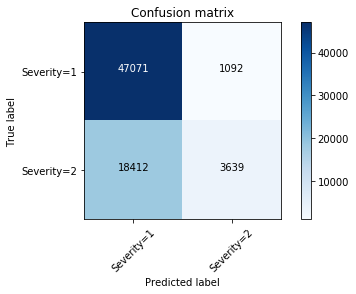

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

In [57]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5625088856180616

As we can see from the model we built, it can accurately predict accidents with a low severity code, but it is not that accurate predicting if an accident is associated to a severity code of 2 (injury related).

## Conclusion

From the model we built, it is clear that the data used to predict the severity of the accidents still suffers from uncertainty as we have a high accuracy rate for accidents related to property damage, but we have a low accuracy score when determining accidents that are related to injuries of the persons involved. Still the overall prediction score using KNN model and Logistic Regression has an accuracy rate of 73%, so we can still consider our model as accurate to determine a the severity of a accident. 

Also, from the recollection of the data, we have determined that the accidents that involve a higher severity index are those related to accidents involving pedestrians and cyclist with almost 100% certainty. So we recommend to the insurance company that it should modify policies of car accidents that are related to hitting pedestrians or cyclists, and to some extent motorcycles. This way, the insurance company decided to reduce the coverage of the person that caused the accident, and covering most of the medical expenses of the pedestrian or cyclist involved in the accident.